# Sea Level Predictor

This notebook has the code used to analyze a [dataset of the global average sea level change](https://datahub.io/core/sea-level-rise) since 1880.

The result of the analysis is used to predict the sea level change through year 2050.

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import linregress

# read data from csv file
df = pd.read_csv("~/Dev/freecodecamp/epa-sea-level.csv")

In [11]:
# Explore the data to understand how it is structured
df.head()

# Test how to select columns
df["Year"].head()
df["CSIRO Adjusted Sea Level"].head()

0    1880
1    1881
2    1882
3    1883
4    1884
Name: Year, dtype: int64

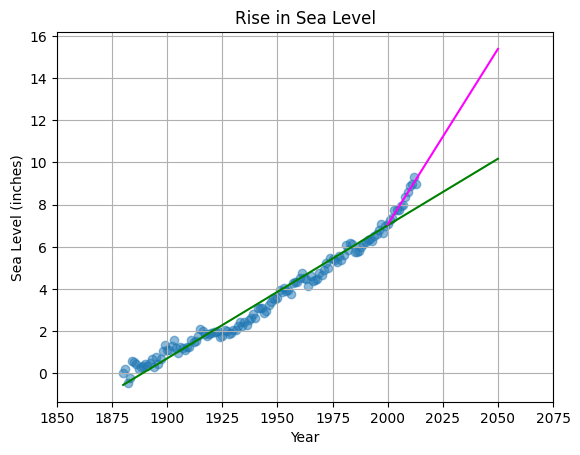

In [73]:
fig, ax = plt.subplots()

# Custom tickers to pass the freeCodeCamp tests
ax.set_xlim(1850, 2075)
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25, offset=0))

# Populate the scatter plot
ax.scatter(df["Year"], df["CSIRO Adjusted Sea Level"], alpha=0.5)

# Add labels and title
ax.set_xlabel("Year")
ax.set_ylabel("Sea Level (inches)")
ax.set_title("Rise in Sea Level")
ax.grid(True)

# Calculate linear regression from 1880 to 2013
res = linregress(df["Year"], df["CSIRO Adjusted Sea Level"])

# Extrapolate to 2050 and plot the line of best fit
df_bestfit = pd.DataFrame({
    "Year": range(1880, 2051),
    "Sea Level": [res.intercept + res.slope * year for year in range(1880, 2051)]
})
ax.plot(df_bestfit["Year"], df_bestfit["Sea Level"], "green")

# Calculate linear regression from 2000 to 2013 (most recent year)
df_recent = df[df["Year"] >= 2000]
res_recent = linregress(df_recent["Year"], df_recent["CSIRO Adjusted Sea Level"])

# Extrapolate from 2000 to 2050 and plot the line of best fit
df_recent_bestfit = pd.DataFrame({
    "Year": range(2000, 2051),
    "Sea Level": [res_recent.intercept + res_recent.slope * year for year in range(2000, 2051)]
})
ax.plot(df_recent_bestfit["Year"], df_recent_bestfit["Sea Level"], "magenta")

## Line of best fit

The `linregress` function from the `scipy.stats` module is used to get the slope and y-intercept of the line of best fit.

In [41]:
df["Year"].tail()

129    2009
130    2010
131    2011
132    2012
133    2013
Name: Year, dtype: int64

In [52]:
print([res.intercept + res.slope * 1880, res.intercept + res.slope * 2050])

[-0.5421240249263661, 10.175455257136548]


In [60]:
recent_df = df[df["Year"] >= 2000]
res2 = linregress(recent_df["Year"], recent_df["CSIRO Adjusted Sea Level"])
res2

LinregressResult(slope=0.1664272733318682, intercept=-325.7934668059649, rvalue=0.9762875716140618, pvalue=2.4388064141618245e-09, stderr=0.010652933111541163, intercept_stderr=21.375153425608215)

In [61]:
[res2.intercept + res2.slope * 2000, res2.intercept + res2.slope * 2050]

[7.06107985777146, 15.382443524364874]

In [64]:
ax.get_lines()[0].get_ydata().tolist()

[-0.5421240249263661, 10.175455257136548]

In [65]:
ax.get_xticks().tolist()

[1825.0,
 1850.0,
 1875.0,
 1900.0,
 1925.0,
 1950.0,
 1975.0,
 2000.0,
 2025.0,
 2050.0,
 2075.0,
 2100.0]

In [76]:
df_bestfit.head()

,Year,Sea Level
0,1880,-0.542124
1,1881,-0.479079
2,1882,-0.416035
3,1883,-0.352990
4,1884,-0.289946


In [77]:
df_bestfit.tail()

,Year,Sea Level
166,2046,9.923277
167,2047,9.986322
168,2048,10.049366
169,2049,10.112411
170,2050,10.175455


In [78]:
df_recent_bestfit.head()

,Year,Sea Level
0,2000,7.061080
1,2001,7.227507
2,2002,7.393934
3,2003,7.560362
4,2004,7.726789


In [79]:
df_recent_bestfit.tail()

,Year,Sea Level
46,2046,14.716734
47,2047,14.883162
48,2048,15.049589
49,2049,15.216016
50,2050,15.382444


In [80]:
df.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


(1850.0, 2075.0)

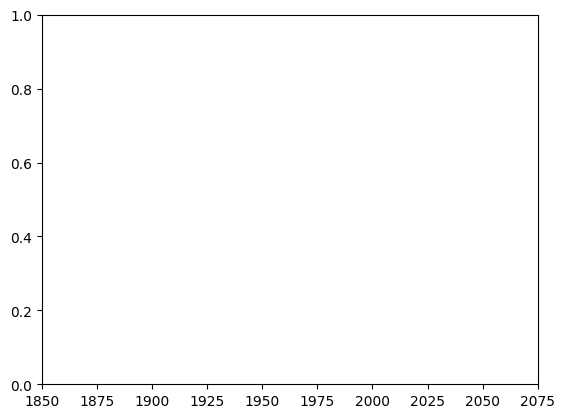

In [83]:
fig, ax = plt.subplots()

# Custom tickers to pass the freeCodeCamp tests
ax.set_xlim(1850, 2075)
#ax.xaxis.set_major_locator(ticker.MultipleLocator(base=25))

In [84]:
ax.get_xticks().tolist()

[1850.0,
 1875.0,
 1900.0,
 1925.0,
 1950.0,
 1975.0,
 2000.0,
 2025.0,
 2050.0,
 2075.0]